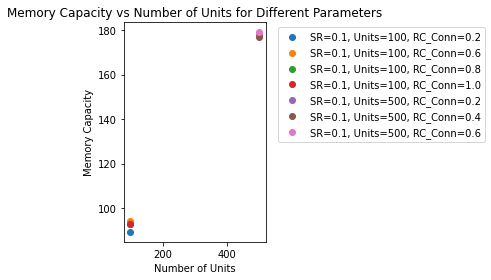

In [1]:
import os
import pickle
import matplotlib.pyplot as plt

# 結果ファイルのパス
output_dir = os.path.join(os.getcwd(), "results/hyper_params_MC")

# ディレクトリが存在するか確認
if not os.path.exists(output_dir):
    raise FileNotFoundError(f"The specified directory does not exist: {output_dir}")

# 保存された結果ファイルを読み込む関数
def load_results(output_dir):
    results = []
    for file_name in os.listdir(output_dir):
        file_path = os.path.join(output_dir, file_name)
        if file_name.endswith(".pkl") and os.path.getsize(file_path) > 0:
            with open(file_path, "rb") as f:
                try:
                    result = pickle.load(f)
                    if isinstance(result, dict):
                        results.append(result)
                except (EOFError, pickle.UnpicklingError):
                    print(f"Warning: Could not load {file_name}, it may be corrupted.")
    return results

# メモリ容量を可視化する関数
def plot_memory_capacity(results):
    if not results:
        print("No valid results to plot.")
        return

    for result in results:
        if all(key in result for key in ["Spectral Radius", "Units", "RC Connectivity", "Memory Capacity"]):
            plt.scatter(result["Units"], result["Memory Capacity"], 
                        label=f"SR={result['Spectral Radius']}, Units={result['Units']}, RC_Conn={result['RC Connectivity']}")

    plt.xlabel("Number of Units")
    plt.ylabel("Memory Capacity")
    plt.title("Memory Capacity vs Number of Units for Different Parameters")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# 実行
results = load_results(output_dir)
plot_memory_capacity(results)